# Water box with Ions

This code contains the analysis of the Week 4 water box simulation.

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import mdtraj as md
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd

In [5]:
# Import trajectory
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week4/water-box_CHARMM/gromacs/water-box_center.xtc'
top_file = '/home/tje3676/comp-lab-class/comp-lab-class/Week4/water-box_CHARMM/gromacs/step3_input.pdb'

In [6]:
# Cl MSD
u = mda.Universe(top_file, file_path)
MSD = msd.EinsteinMSD(u, select='name CLA', msd_type='xyz', fft=True)
MSD.run()

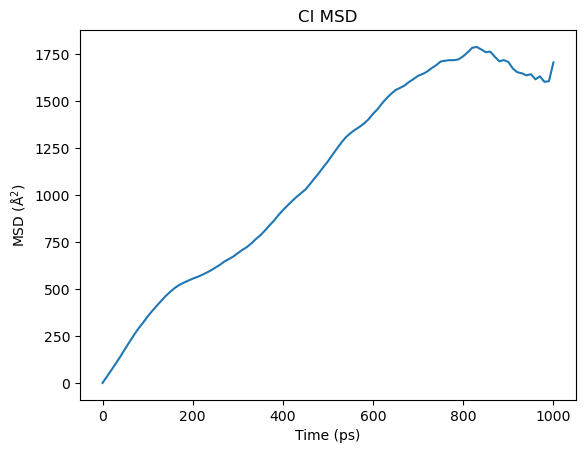

In [16]:
plt.plot(MSD.times, MSD.results.timeseries)
plt.xlabel("Time (ps)")
plt.ylabel("MSD ($\\mathrm{\\AA}^2$)")
plt.title("Cl MSD")
plt.show()

In [19]:
# Na MSD 
MSD = msd.EinsteinMSD(u, select='name SOD', msd_type='xyz', fft=True)
MSD.run()

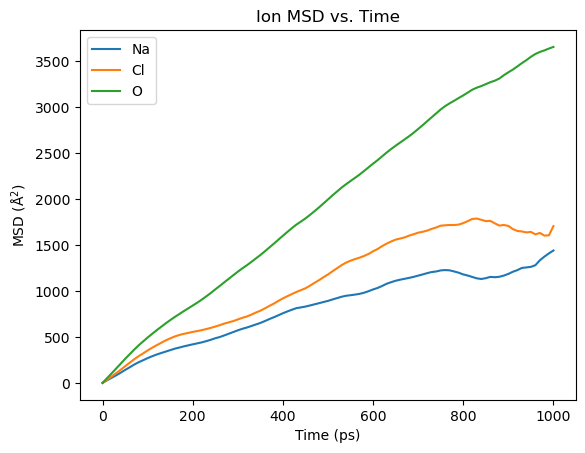

In [29]:
fig, ax = plt.subplots()  # Create a single subplot

# Plot Cl, Na, and water O on the same subplot
MSD = msd.EinsteinMSD(u, select='name SOD', msd_type='xyz', fft=True)
MSD.run()
ax.plot(MSD.times, MSD.results.timeseries, label='Na')
MSD = msd.EinsteinMSD(u, select='name CLA', msd_type='xyz', fft=True)
MSD.run()
ax.plot(MSD.times, MSD.results.timeseries, label='Cl')
MSD = msd.EinsteinMSD(u, select='name OH2', msd_type='xyz', fft=True)
MSD.run()
ax.plot(MSD.times, MSD.results.timeseries, label='O')

# Plot settings
plt.xlabel("Time (ps)")
plt.ylabel("MSD ($\\mathrm{\\AA}^2$)")
plt.title("Ion MSD vs. Time")
plt.legend()

# Show the graph
plt.show()